# Stage 3 : EDA

We have the clean data; accounting for basic aspects of data quality
- Type consistency


As well are more bespoke aspects
- Reduce class imbalance


In [50]:
import os
import pandas as pd
import io
import numpy as np
import matplotlib.pyplot as plt

In [51]:
def _load_data(ROOT):
    
    with open(os.path.join(ROOT,'USCensus1990raw.attributes.txt'), 'r') as f:
        text = f.read()
    print(text)
    
    
    sep = '__________________________________________________________________________________'

    all_codes = {}
    for t in text.split(sep)[1:]:

        lines = t.split('\n')

        colname = lines[1][:10].rstrip(' ')
        lines = [l.lstrip(' ').rstrip(' ') for l in lines[2:] if (l !='') and not l.startswith('VAR:')]
        coding = {}
        for line in lines:
            l = [l for l in line.split(' ') if l != '']
            coding[l[0]] = " ".join(l[1:])

        all_codes[colname] = coding
        
        
    cols = text.split('__________________________________________________________________________________')
    len(cols)
    cols = [c.split('\n')[1] for c in cols[1:]]
    cols = [c for c in cols if c != '']
    frame = ""
    for c in cols:
        li = [c[:10].rstrip(' '), c[13:14], c[21:22],c[28:29], c[42:].replace(",", ".")]
        if len(li) !=5:
            print(li)
        frame += r",".join(li) + "\n"


    df_meta = pd.read_csv(io.StringIO(frame), sep=',', header=None, names=['Var', 'Type', 'Des', 'Len', 'Description'])
    
    return df_meta, all_codes


df_meta, all_codes = _load_data(r"/Users/tom.jubb/Documents/data/us_census/")

                           U.S. DEPARTMENT OF COMMERCE
                                 BUREAU OF CENSUS

                          *** DATA EXTRACTION SYSTEM ***

  DOCUMENTATION OF: FILE CONTENTS

  FOR DATA COLLECTION: 'pums901p' - 1990 Decenial Census 1% PUMS - Persons Records

    VAR: = Variable Name
    TYP: = Variable Type     ( C = Categorical, N = Numeric Continuous )
    DES: = Designation       ( P = Primary Variable, X = Non-Primary )
    LEN: = Length            ( of the Variable in Characters )
    CAT: = Category          ( of the Variable )


VAR:        TYP:   DES:    LEN:   CAT:    VARIABLE/CATEGORY LABEL:
__________________________________________________________________________________
AAGE         C       X      1             Age Allocation Flag
                                  0       No
                                  1       Yes

VAR:        TYP:   DES:    LEN:   CAT:    VARIABLE/CATEGORY LABEL:
_______________________________________________________________

In [52]:
df = pd.read_csv('us_census_data_cleaned_3.csv').drop('Unnamed: 0', axis=1)

In [53]:
df.head(5)

,AGE,ANCSTRY1,ANCSTRY2,ASERVPER,AVAIL,AVETS1,CITIZEN,CLASS,DEPART,DISABL1,...,YEARSCH,YEARWRK,YRSSERV,multilingual,YEARSCH_CAT,OCCUP_JOB,OCCUP_SUM,OCCUP_MAJ,INDUSTRY_CAT,INDUSTRY_SUM
0,30,999,999,0,0,0,True,"Local Gov. Emp. City, County, Etc.",800,2,...,11,1,0,1,"Some Coll., But No Degree","Cooks (5214, 5215)",SERVICE OCCUPATIONS,"Service Occupations, Except Protective and Hou...",Elementary and secondary schools (821),PROFESSIONAL AND RELATED SERVICES
1,44,999,999,0,0,0,True,Emp. of a Private for Profit Company or,530,2,...,11,1,0,1,"Some Coll., But No Degree",Electricians (part 6432),"PRECISION PRODUCTION, CRAFT, AND REPAIR OCCUPA...",Construction Trades,"CONSTRUCTION (15, 16, 17)","CONSTRUCTION (15, 16, 17)"
2,47,50,999,0,0,0,True,"Local Gov. Emp. City, County, Etc.",1430,2,...,11,1,2,1,"Some Coll., But No Degree","Police and detectives, public service (5132)",SERVICE OCCUPATIONS,Protective Service Occupations,"Justice, public order, and safety (92)",PUBLIC ADMINISTRATION
3,42,615,999,0,0,0,False,"Self Emp. in Own Not Incorp.d Business,",700,2,...,16,1,0,1,Professional Degree,Physicians (261),MANAGERIAL AND PROFESSIONAL SPECIALTY OCCUPATIONS,Professional Specialty Occupations,"Offices and clinics of physicians (801, 803)",PROFESSIONAL AND RELATED SERVICES
4,52,210,999,0,0,0,True,Fed. Gov. Emp.,500,2,...,13,1,9,1,"Associate Degree in Coll., Academic Prog","Production inspectors, checkers, and examiners...","OPERATORS, FABRICATORS, AND LABORERS","Machine Operators, Assemblers, and Inspectors",Electric light and power (491),"TRANSPORTATION, COMMUNICATIONS, AND OTHER PUBL..."


One aspect we need to pay attention to is what tpye of data is in each feature, categorical vs continuous

In [54]:
num_cols = [
    'AGE',
    'YEARWRK',
    'FERTIL',
    'HOUR89',
    'HOURS',
    'RIDERS',
    'WEEK89', 
    'TRAVTIME',
    'YRSSERV',
    'REARNING',
    'INCOME1',
    'PWGT1',
    'DEPART',
    'RIDERS',
]

cats = [
    'OCCUP',
    'OCCUP_JOB',
    'OCCUP_SUM',
    'OCCUP_MAJ',
    'INDUSTRY',
    'RACE',
    'SEX',
    'ENGLISH',
    'FERTIL',
    'WWII',
    'SCHOOL',
    'MARITAL',
    'MEANS',
    'MILITARY',
    'CITIZEN',
    'YEARSCH',
    'CLASS',
#     'SEPT80',
    'POWSTATE',
    'VIETNAM',
    'KOREAN'
]

In [55]:
def describe_feature(x): 
    v = df_meta[df_meta['Var'] == x]['Description'].values
    if len(v) == 0:
        return ''
    else:
        return v[0]

for x in list(df.columns):
    try:
        print(f"{x:<20} - {describe_feature(x)}")
    except:
        print(x)

AGE                  - Age
ANCSTRY1             - Ancestry First Entry See Appendix I Ance
ANCSTRY2             - Ancestry Second Entry See Appendix I Anc
ASERVPER             - Military Per. of Srvc. Allocation Flag
AVAIL                - Available for Work
AVETS1               - Military Srvc. Allocation Flag
CITIZEN              - Citizenship
CLASS                - Class of Worker
DEPART               - Time of Departure for Work Hour and Minu
DISABL1              - Work Limitation Stat.
DISABL2              - Work Prevented Stat.
ENGLISH              - Ability to Speak English
FEB55                - Served February 1955 July 1964
FERTIL               - No. of Chld. Ever Born
HISPANIC             - Detailed Hispanic Origin Code See Append
HOUR89               - Usual Hrs. Worked Per Week Last Yr. 1989
HOURS                - Hrs. Worked Last Week
IMMIGR               - Yr. of Entry
INDUSTRY             - Ind. See Appendix I Ind..lst
KOREAN               - Served Korean Conflict June 

# Explore how input features influence target variable

- EDA will uncover ways to further clean data (one of the common feedback loops in ML)

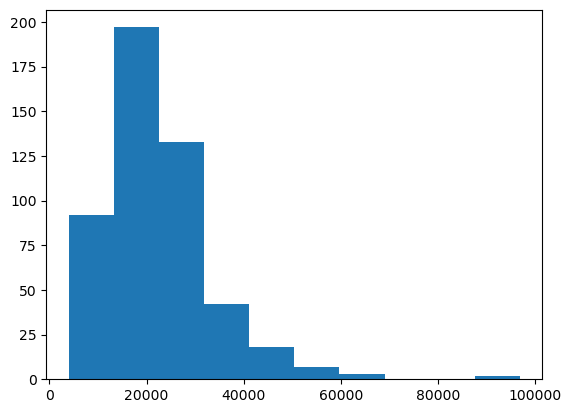

In [37]:
# histogram of mean wage per occupation
_ = plt.hist(df[['OCCUP', 'REARNING']].groupby('OCCUP').mean())

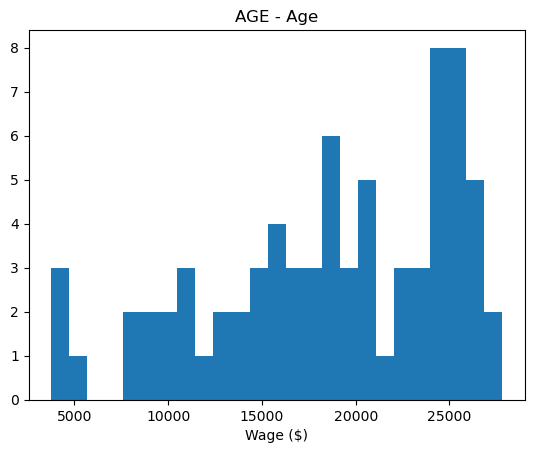

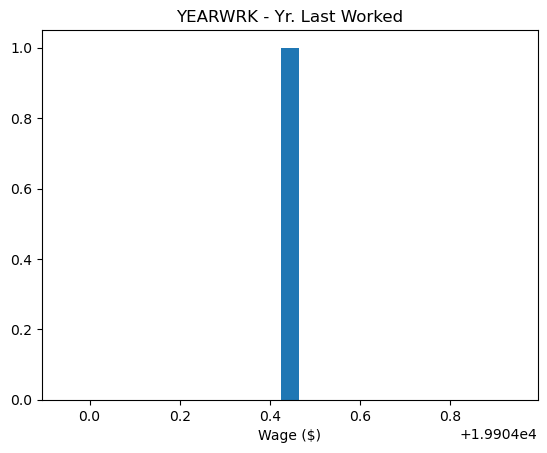

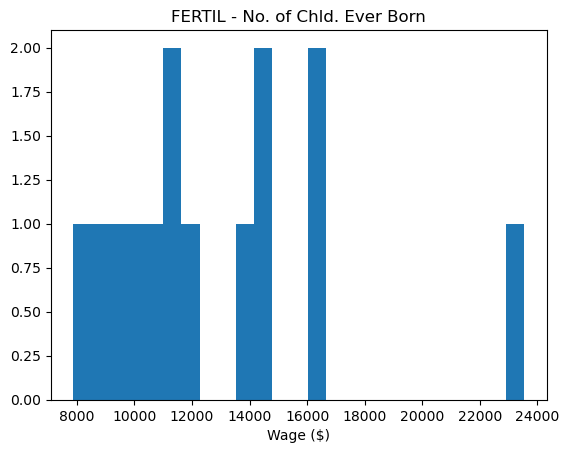

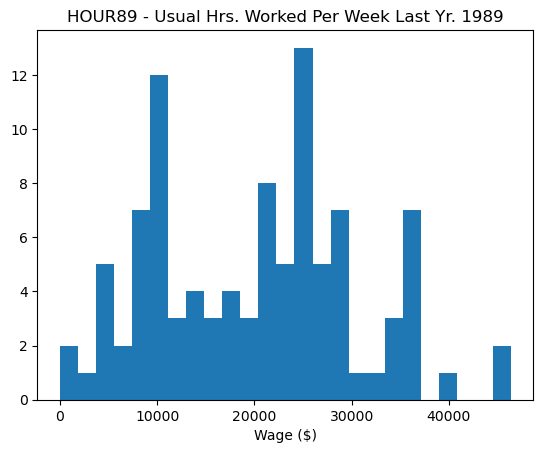

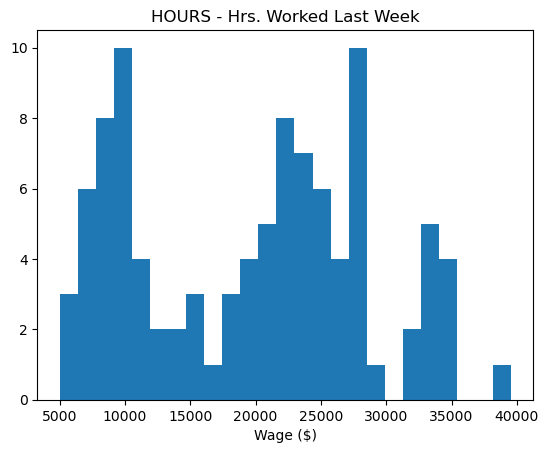

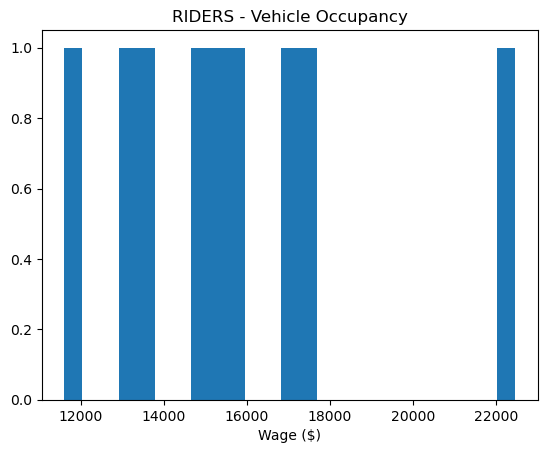

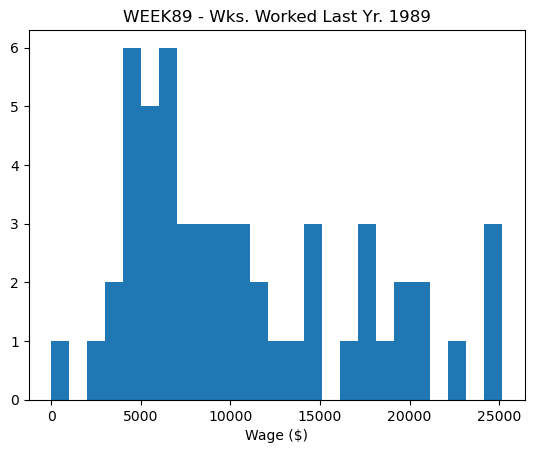

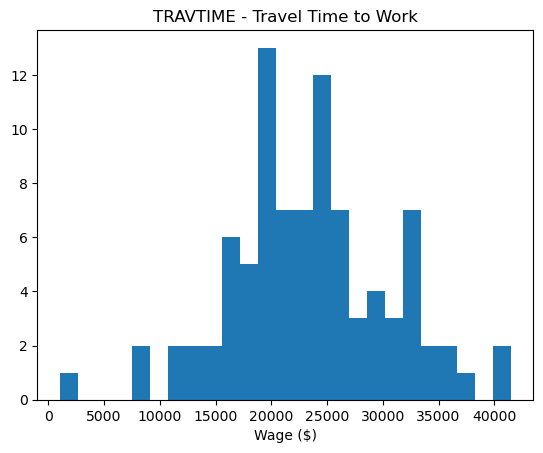

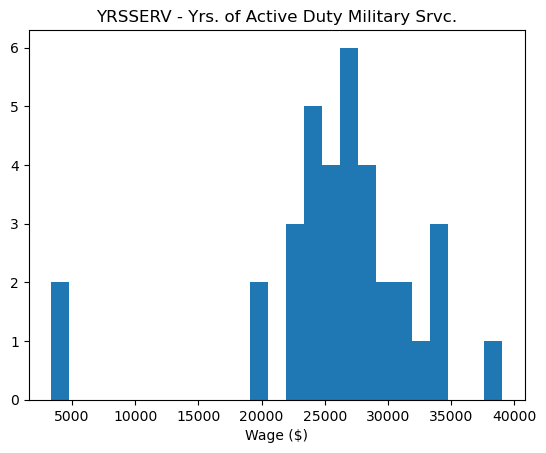

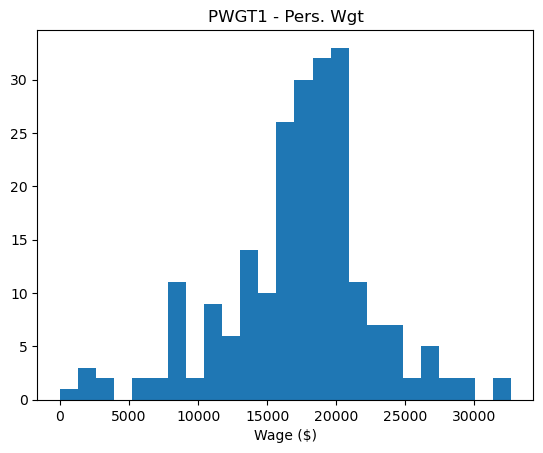

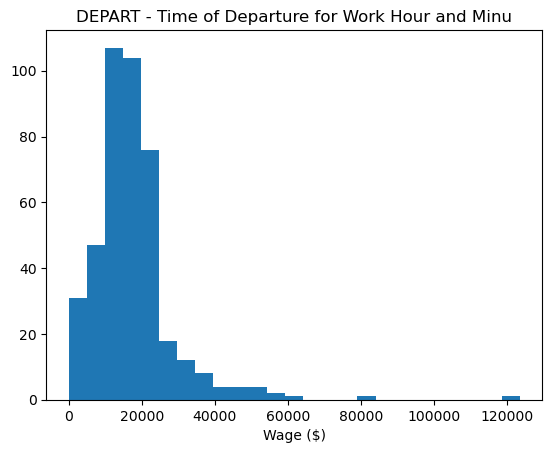

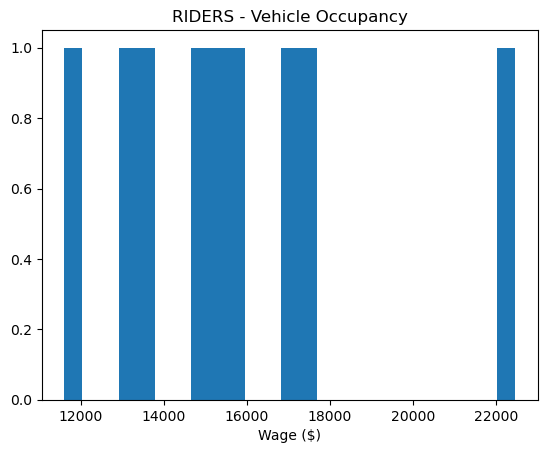

In [8]:
# histogram of mean wage per occupation
for var in num_cols:
    if var == 'REARNING' or var not in df.columns:
        continue
    _ = plt.hist(df[[var, 'REARNING']].groupby(var).mean(), bins=25)
    plt.title(f"{var} - {describe_feature(var)}")
    plt.xlabel(r"Wage ($)")
    plt.show()

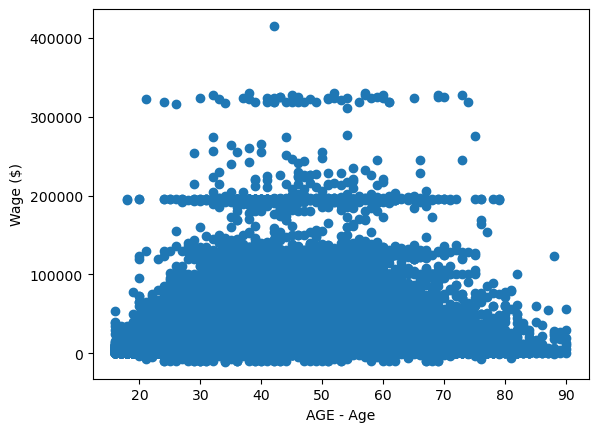

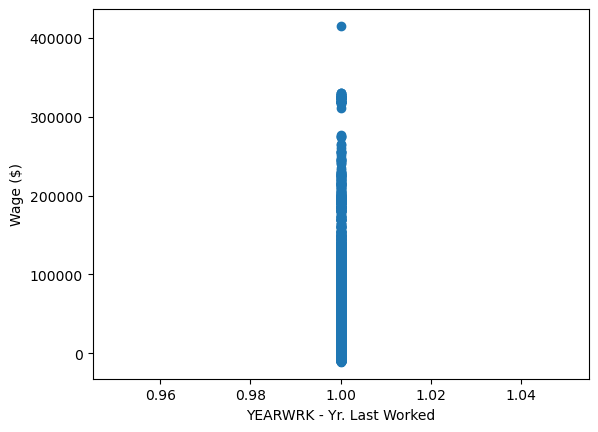

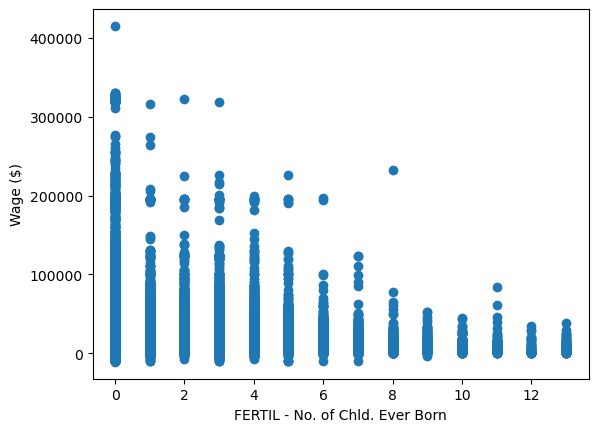

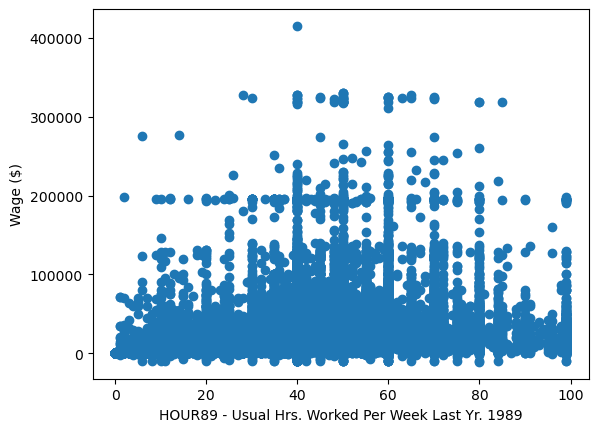

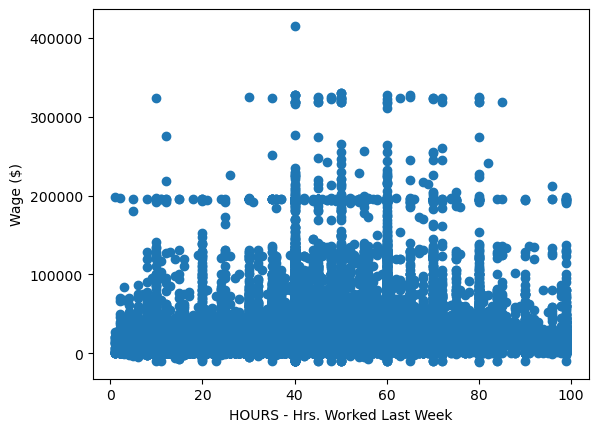

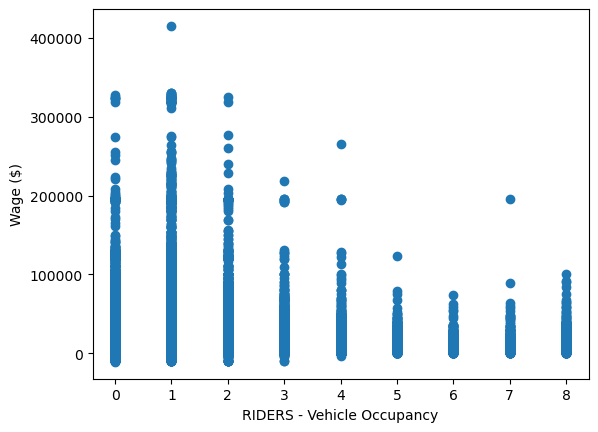

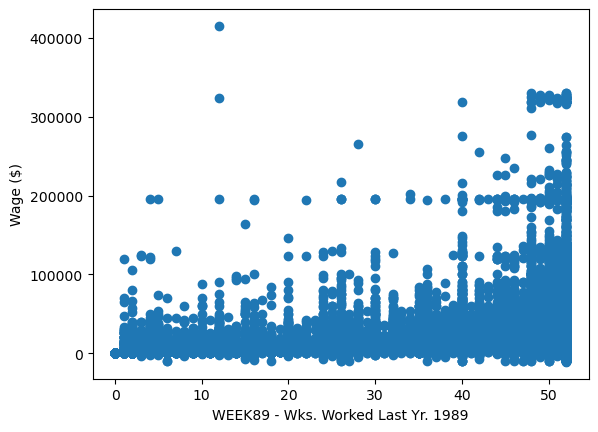

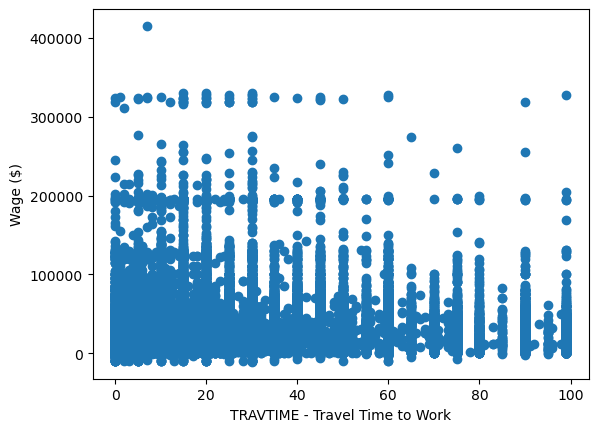

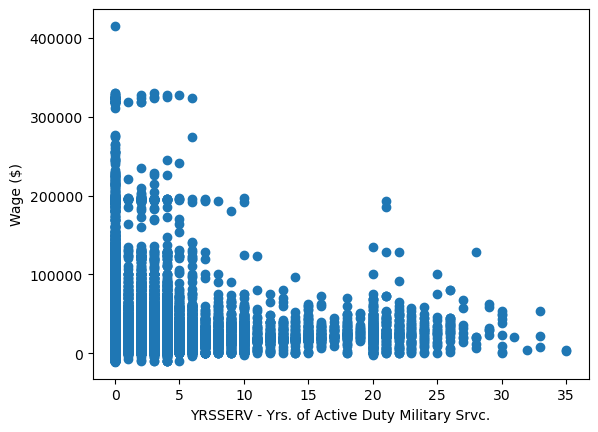

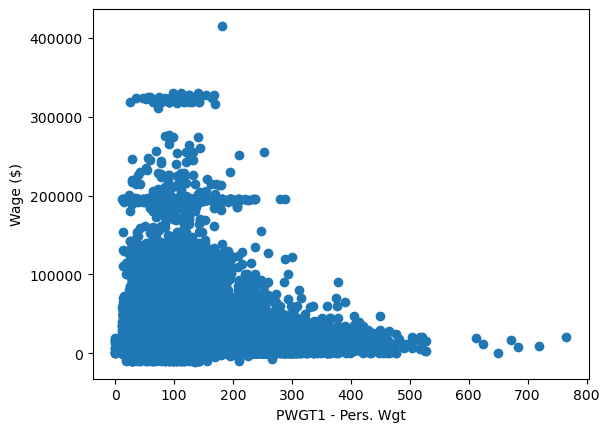

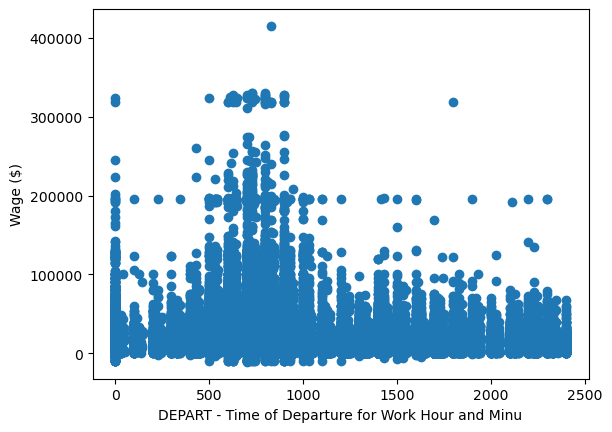

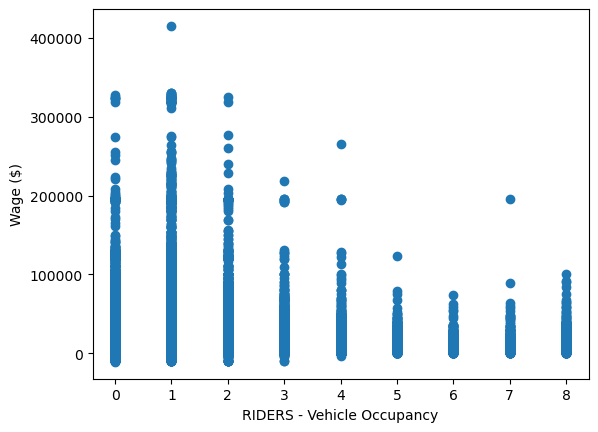

In [9]:
# histogram of mean wage per occupation
for var in num_cols:
    if var == 'REARNING' or var not in df.columns:
        continue
    _ = plt.scatter(df[var].values, df['REARNING'])
    plt.xlabel(f"{var} - {describe_feature(var)}")
    plt.ylabel(r"Wage ($)")
    plt.show()

In [8]:
import seaborn

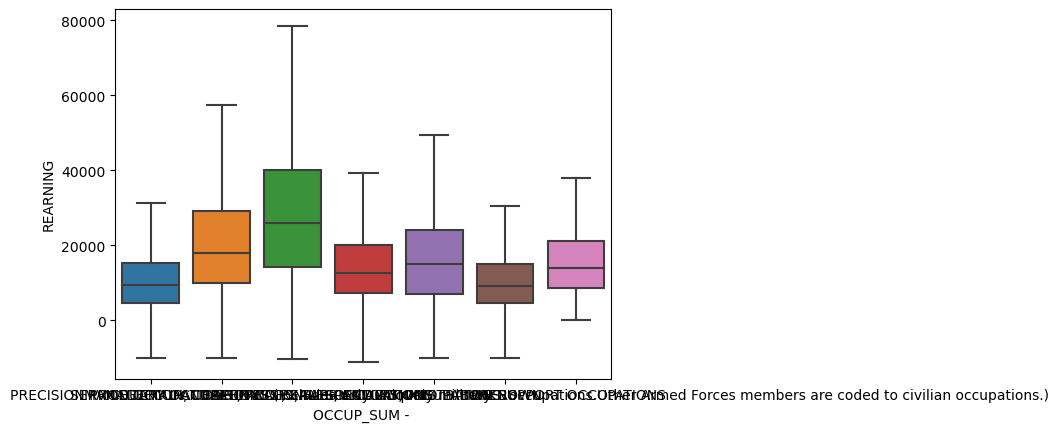

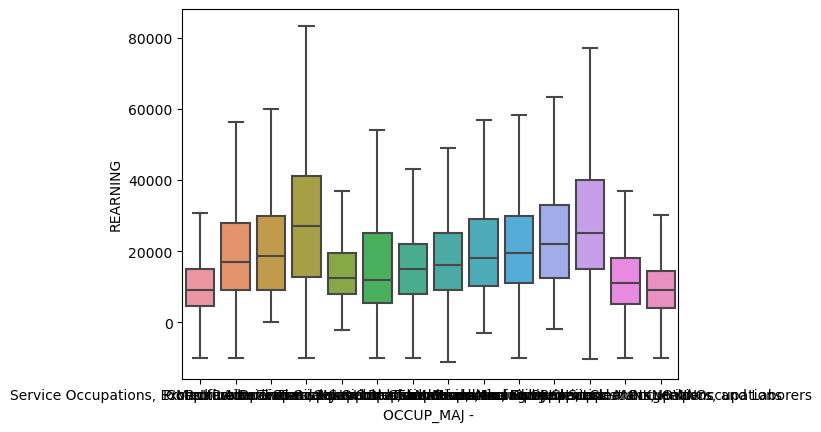

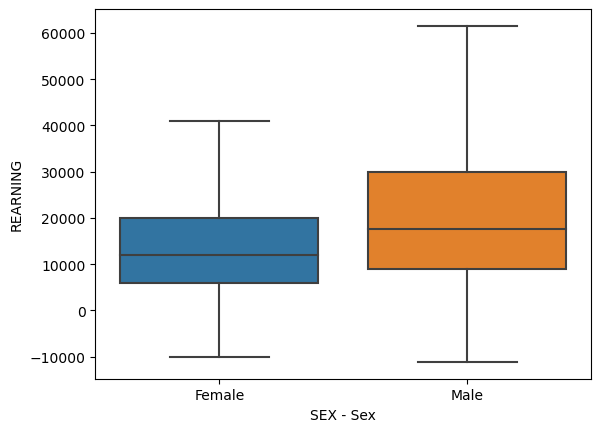

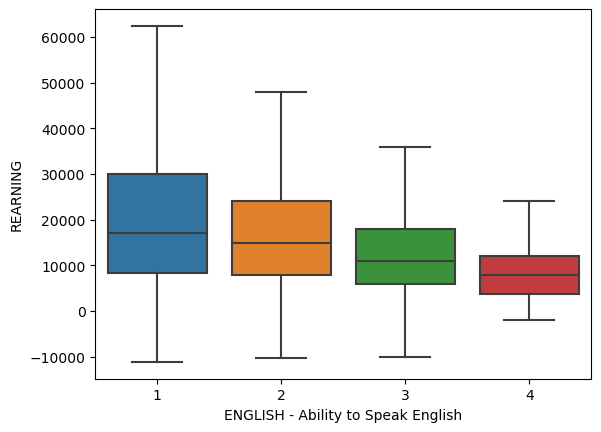

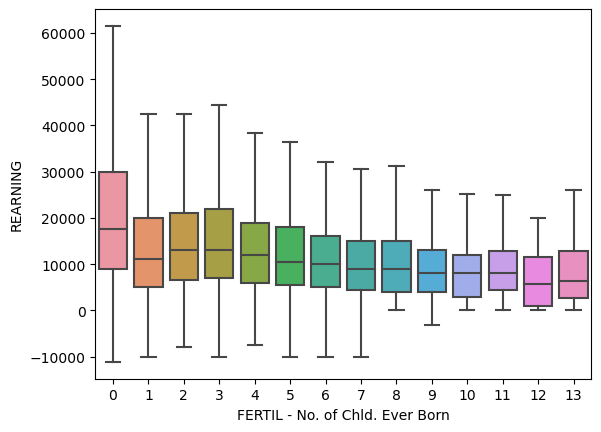

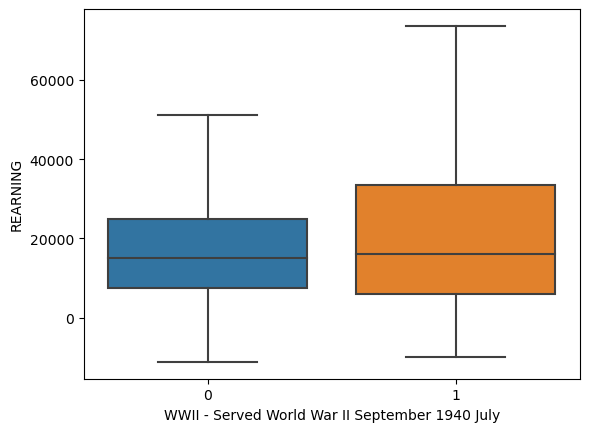

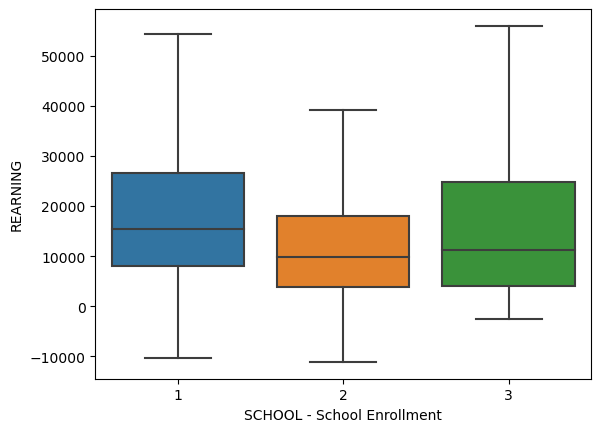

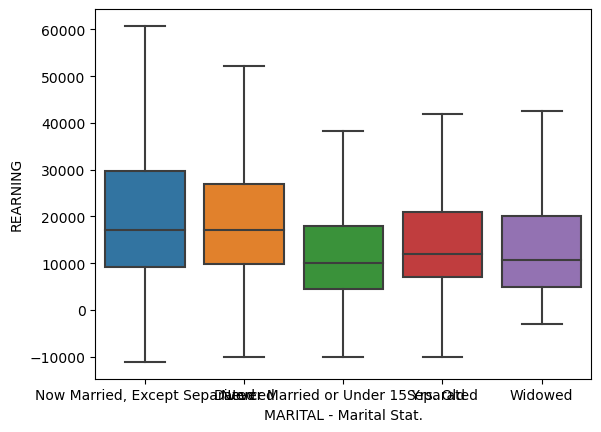

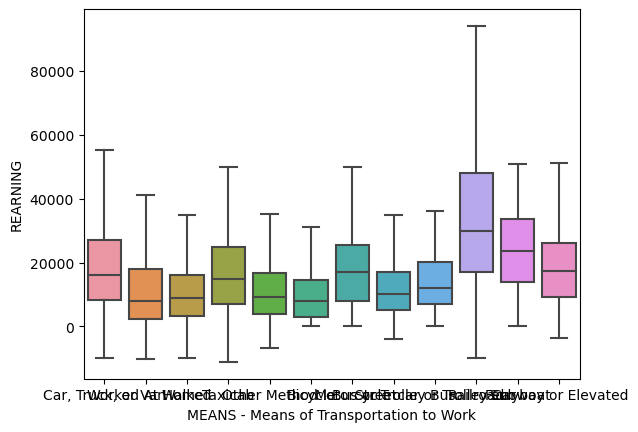

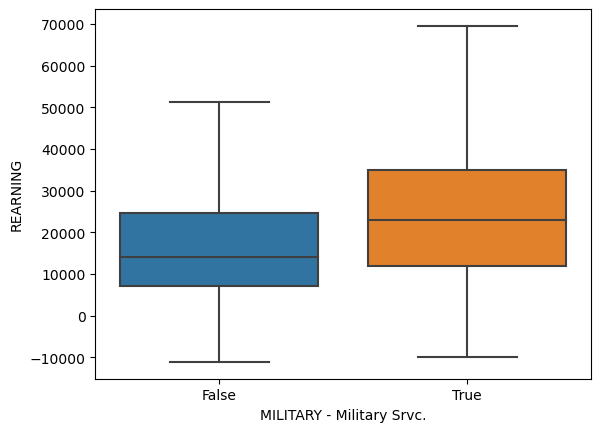

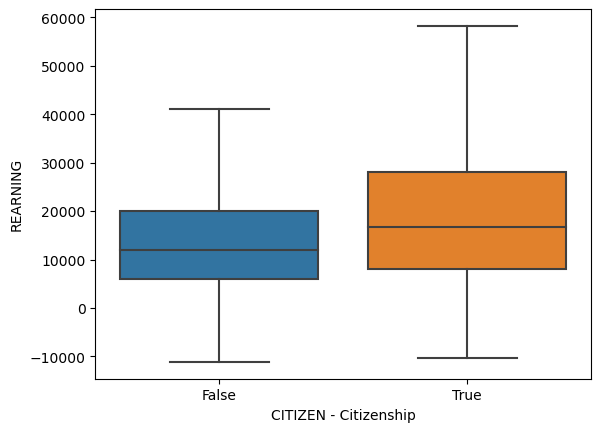

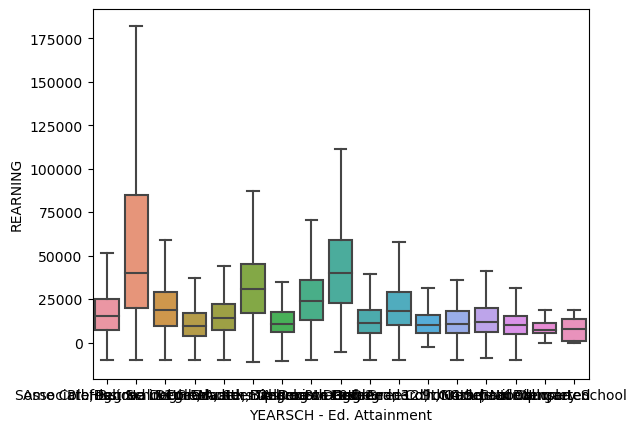

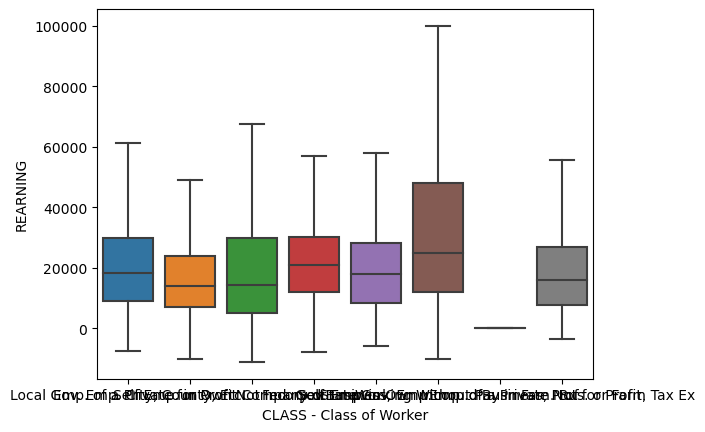

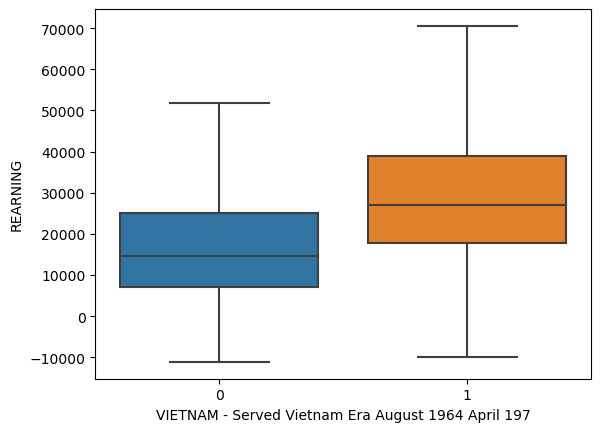

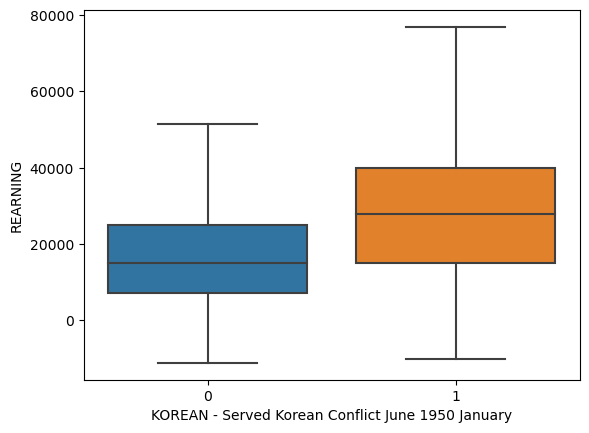

In [45]:
for var in cats:
    cardinality = len(df[var].unique())
    if cardinality > 50:
        continue
    seaborn.boxplot(x =var,
                    y ='REARNING',
                    data = df[[var, 'REARNING']],
                    orient="v",
                    showfliers = False)
    plt.xlabel(f"{var} - {describe_feature(var)}")
    plt.show()

## Data Insights 

#### Highest Paid Jobs?

In [363]:
# how mnay judges are there?
df_tmp = df[['OCCUP_JOB','PWGT1', 'REARNING']]
print(df_tmp[df_tmp['OCCUP_JOB'] == "Judges (212)"]['PWGT1'].sum())

# how mnay lawyers are there?
df_tmp = df[['OCCUP_JOB','PWGT1', 'REARNING']]
df_tmp[df_tmp['OCCUP_JOB'] == "Lawyers (211)"]['PWGT1'].sum()

2073.0


46084.0

/var/folders/5h/f90lxdwx30g73cny2g94t7h80000gp/T/ipykernel_13041/981130797.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gb['count']     = gb['PWGT1'].astype(int)
/var/folders/5h/f90lxdwx30g73cny2g94t7h80000gp/T/ipykernel_13041/981130797.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gb['OCCUP_JOB'] = gb['OCCUP_JOB'].astype(str)
/var/folders/5h/f90lxdwx30g73cny2g94t7h80000gp/T/ipykernel_13041/981130797.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFram

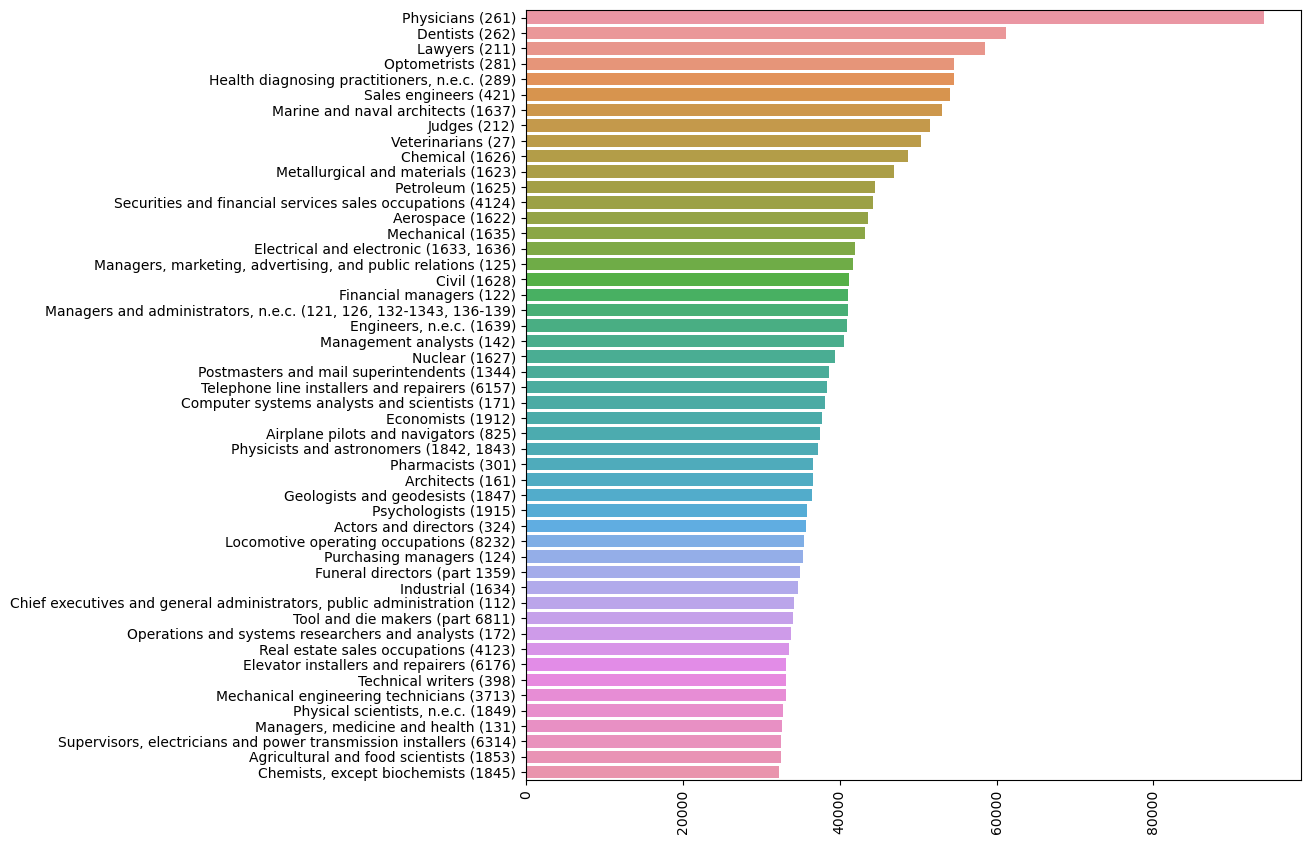

In [356]:
gb = df[['OCCUP_JOB','PWGT1', 'REARNING']]

gb['count']     = gb['PWGT1'].astype(int)
gb['OCCUP_JOB'] = gb['OCCUP_JOB'].astype(str)
gb['REARNING']  = gb['REARNING'] * gb['PWGT1']

gb = gb.groupby('OCCUP_JOB').sum()

min_thresh = gb.sum()['count'] > 1000
gb = gb[gb['count'] > 1000]

gb['REARNING'] = gb['REARNING'] / gb['PWGT1']

df_plot = gb.reset_index().reindex().sort_values('REARNING', ascending=False)

df_plot = df_plot.reset_index().drop('index', axis=1)#.iloc[-100:,:]

fig, ax = plt.subplots(1,1,figsize=(10,10))

seaborn.barplot(data=None,
                y=df_plot['OCCUP_JOB'].values[:50].astype('str'), 
                x=df_plot['REARNING'].values[:50],
                orient="h")
_ = plt.xticks(rotation=90) 

In [47]:
all_codes['YEARSCH']

{'00': 'N/a Less Than 3 Yrs. Old',
 '01': 'No School Completed',
 '02': 'Nursery School',
 '03': 'Kindergarten',
 '04': '1st, 2nd, 3rd, or 4th Grade',
 '05': '5th, 6th, 7th, or 8th Grade',
 '06': '9th Grade',
 '07': '10th Grade',
 '08': '11th Grade',
 '09': '12th Grade, No Diploma',
 '10': 'High School Graduate, Diploma or Ged',
 '11': 'Some Coll., But No Degree',
 '12': 'Associate Degree in Coll., Occupational',
 '13': 'Associate Degree in Coll., Academic Prog',
 '14': 'Bachelors Degree',
 '15': 'Masters Degree',
 '16': 'Professional Degree',
 '17': 'Doctorate Degree'}

In [355]:
print(df[df['YEARSCH'] != 17]['REARNING'].mean())
print(df[df['YEARSCH'] >= 12]['REARNING'].mean())
print(df[df['YEARSCH'] >= 16]['REARNING'].mean())

19572.12878109635
31264.724866174864
55752.25805734608


### Best place to live

In [386]:
gb = df[['POWSTATE', 'PWGT1', 'AGE', 'REARNING']]

gb = gb[gb['REARNING'] > 5000]
gb = gb[gb['AGE'] > 18]

gb['count']     = gb['PWGT1'].astype(int)
gb['POWSTATE']  = gb['POWSTATE'].astype(str)
gb['REARNING']  = gb['REARNING'] * gb['PWGT1']

gb = gb.groupby('POWSTATE').sum().reset_index().reindex()

gb['REARNING'] = gb['REARNING'] / gb['PWGT1']
gb['POWSTATE'] = gb['POWSTATE'].apply(lambda x: all_codes['POWSTATE'][str(x).zfill(2)])
gb = gb.sort_values('REARNING', ascending=False)

gb.head(5)

,POWSTATE,PWGT1,AGE,REARNING,count
51,Abroad,13847.0,5261,31118.857370,13847
2,District of Columbia,100898.0,36074,31036.278529,100898
17,Michigan,179345.0,65174,30335.448672,179345
45,West Virginia,8705.0,3376,28627.425273,8705
38,Tennessee,48707.0,16917,27836.421808,48707


(15000.0, 35000.0)

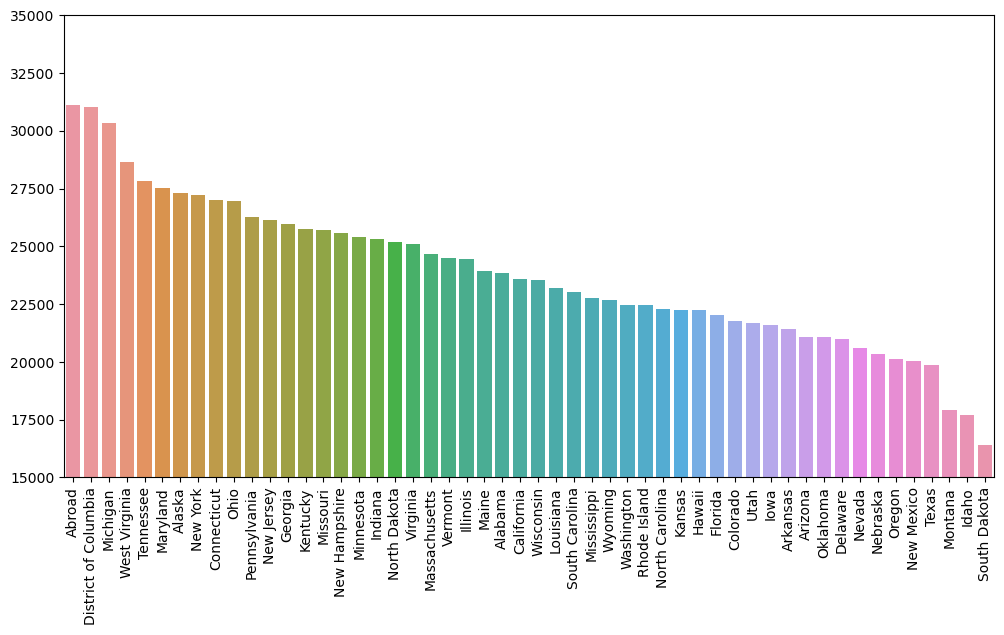

In [388]:
fig, ax = plt.subplots(1,1,figsize=(12,6))

seaborn.barplot(data=None,
                x=gb['POWSTATE'].values[:100].astype('str'), 
                y=gb['REARNING'].values[:100],
                orient="v")
_ = plt.xticks(rotation=90) 
plt.ylim([15000,35000])

In [389]:
gb = df[['POWSTATE', 'PWGT1', 'AGE', 'REARNING']]

gb = gb[gb['REARNING'] > 5000]
gb = gb[(gb['AGE'] > 50) & (gb['AGE'] <= 80)]

gb['count']     = gb['PWGT1'].astype(int)
gb['POWSTATE']  = gb['POWSTATE'].astype(str)
gb['REARNING']  = gb['REARNING'] * gb['PWGT1']

gb = gb.groupby('POWSTATE').sum().reset_index().reindex()

gb['REARNING'] = gb['REARNING'] / gb['PWGT1']
gb['POWSTATE'] = gb['POWSTATE'].apply(lambda x: all_codes['POWSTATE'][str(x).zfill(2)])
gb = gb.sort_values('REARNING', ascending=False)

gb.head(5)

,POWSTATE,PWGT1,AGE,REARNING,count
12,Kentucky,2900.0,2086,47840.164828,2900
45,West Virginia,2099.0,1131,43600.475941,2099
2,District of Columbia,13765.0,8208,42149.372612,13765
51,Abroad,2170.0,1235,41683.939171,2170
10,Alaska,3563.0,2580,39965.635981,3563


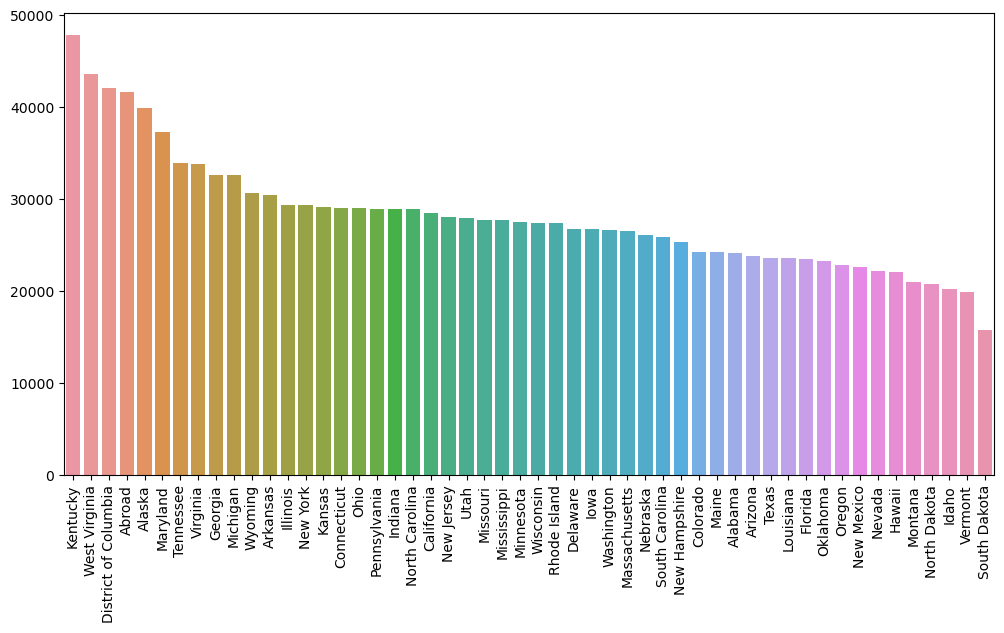

In [391]:
fig, ax = plt.subplots(1,1,figsize=(12,6))

seaborn.barplot(data=None,
                x=gb['POWSTATE'].values.astype('str'), 
                y=gb['REARNING'].values,
                orient="v")
_ = plt.xticks(rotation=90) 

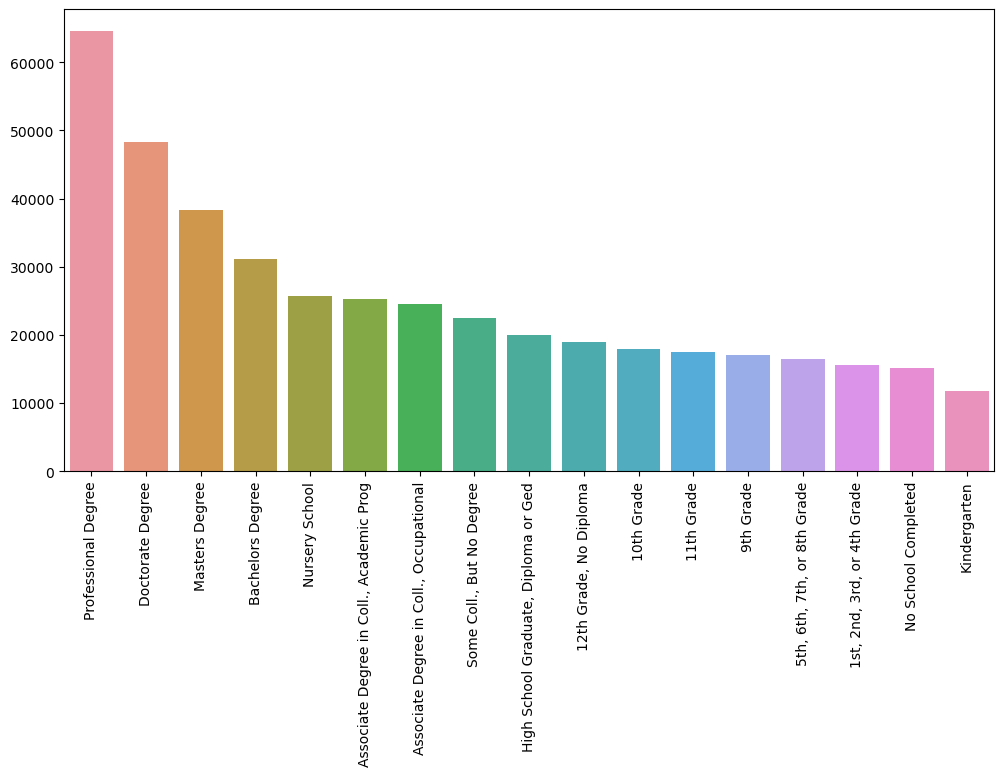

In [397]:
gb = df[['YEARSCH', 'PWGT1', 'AGE', 'REARNING']]

gb = gb[gb['REARNING'] > 5000]
gb = gb[gb['AGE'] > 18]

gb['count']     = gb['PWGT1'].astype(int)
gb['YEARSCH']   = gb['YEARSCH'].astype(str)
gb['REARNING']  = gb['REARNING'] * gb['PWGT1']

gb = gb.groupby('YEARSCH').sum().reset_index().reindex()

gb['REARNING'] = gb['REARNING'] / gb['PWGT1']
gb['YEARSCH']  = gb['YEARSCH'].apply(lambda x: all_codes['YEARSCH'][str(x).zfill(2)])
gb = gb.sort_values('REARNING', ascending=False)




fig, ax = plt.subplots(1,1,figsize=(12,6))

seaborn.barplot(data=None,
                x=gb['YEARSCH'].values[:100].astype('str'), 
                y=gb['REARNING'].values[:100],
                orient="v")
_ = plt.xticks(rotation=90) 

In [398]:
import pandas as pd
import folium
from   folium.plugins import MarkerCluster
import geocoder
import json

In [399]:
states_geo = '/Users/tom.jubb/Downloads/USA_States_(Generalized).geojson'
[f['properties']['STATE_NAME'] for f in json.load(open(states_geo,'r'))['features']]

['Alaska',
 'California',
 'Hawaii',
 'Idaho',
 'Nevada',
 'Oregon',
 'Washington',
 'Arizona',
 'Arkansas',
 'Colorado',
 'Iowa',
 'Kansas',
 'Louisiana',
 'Minnesota',
 'Missouri',
 'Montana',
 'Nebraska',
 'New Mexico',
 'North Dakota',
 'Oklahoma',
 'South Dakota',
 'Texas',
 'Utah',
 'Wyoming',
 'Alabama',
 'Connecticut',
 'Delaware',
 'District of Columbia',
 'Florida',
 'Georgia',
 'Illinois',
 'Indiana',
 'Kentucky',
 'Maine',
 'Maryland',
 'Massachusetts',
 'Michigan',
 'Mississippi',
 'New Hampshire',
 'New Jersey',
 'New York',
 'North Carolina',
 'Ohio',
 'Pennsylvania',
 'Rhode Island',
 'South Carolina',
 'Tennessee',
 'Vermont',
 'Virginia',
 'West Virginia',
 'Wisconsin']

In [400]:
df.head(1)

,AGE,ANCSTRY1,ANCSTRY2,ASERVPER,AVAIL,AVETS1,CITIZEN,CLASS,DEPART,DISABL1,...,YEARWRK,YRSSERV,multilingual,YEARSCH_CAT,OCCUP_JOB,OCCUP_SUM,OCCUP_MAJ,INDUSTRY_CAT,INDUSTRY_SUM,RACE_BW
0,30,999,999,0,0,0,True,"Local Gov. Emp. City, County, Etc.",800,2,...,1,0,1,"Some Coll., But No Degree","Cooks (5214, 5215)",SERVICE OCCUPATIONS,"Service Occupations, Except Protective and Hou...",Elementary and secondary schools (821),PROFESSIONAL AND RELATED SERVICES,white


In [401]:
df_wage = df.copy()
df_wage = df_wage[df_wage['REARNING'] > 5000]
df_wage = df_wage[(df_wage['AGE'] > 0) & (df_wage['AGE'] < 100)]

df_wage['REARNING'] = df_wage['REARNING'] * df_wage['PWGT1']
gb_wage = df_wage[['POWSTATE', 'REARNING', 'PWGT1']].groupby('POWSTATE')

df_wage = gb_wage.sum().reset_index()
df_wage['REARNING'] = df_wage['REARNING'] / df_wage['PWGT1']

df_wage['POWSTATE'] = df_wage['POWSTATE'].apply(lambda x: all_codes['POWSTATE'][str(x).zfill(2)])
df_wage = df_wage.sort_values('REARNING')

In [402]:
world_choropelth = folium.Map(location=[0, 0], 
                              tiles='Cartodb Positron',
                              zoom_start=2)

world_choropelth.choropleth(
    geo_data=states_geo,
    data=df_wage,
    columns=['POWSTATE', 'REARNING'],
    key_on='feature.properties.STATE_NAME',
    fill_color='YlOrRd',
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Mean Salary ($)')

# display map
world_choropelth

/Users/tom.jubb/anaconda3/envs/dio/lib/python3.9/site-packages/folium/folium.py:407: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  warnings.warn(


In [79]:
df[['OCCUP','AGE','REARNING']].groupby('OCCUP').mean()

,AGE,REARNING
OCCUP,,
3,49.285714,30379.500000
4,48.625000,27433.812500
5,43.053991,31774.995305
6,43.527778,31336.138889
7,39.272242,40924.040925
...,...,...
888,36.294038,11046.880759
889,35.864865,13006.152234
903,34.962025,26430.658228


### Jobs

In [220]:
gb          = df[['OCCUP_JOB', 'REARNING']].copy()
gb['count'] = 1
gb          = gb.groupby('OCCUP_JOB')

df_plot = gb.mean()[gb.sum()['count']>500].reset_index().reindex().sort_values('REARNING', ascending=False)
df_plot = df_plot.reset_index().drop('index', axis=1)

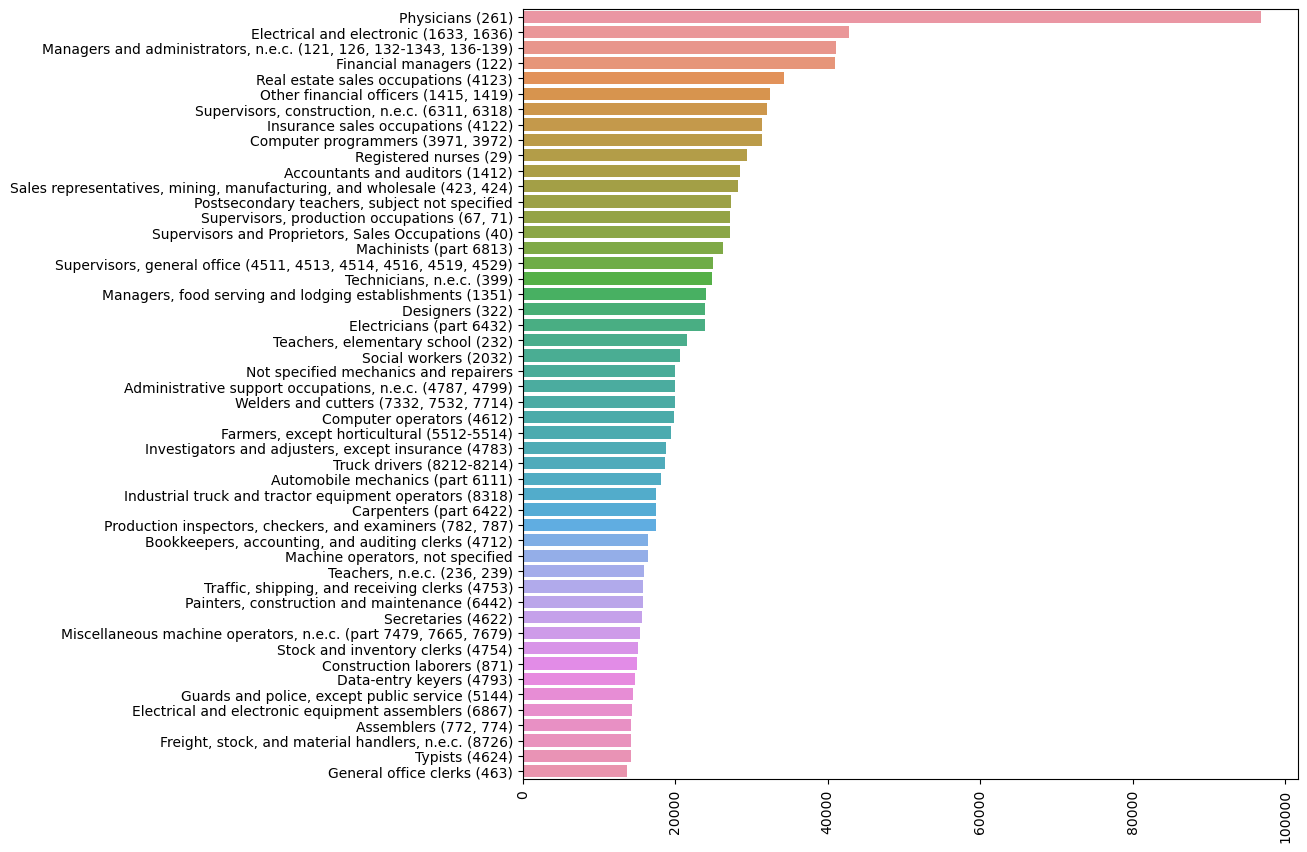

In [221]:
top_k = 50
fig, ax = plt.subplots(1,1,figsize=(10,10))
seaborn.barplot(data=None,
                y=df_plot['OCCUP_JOB'].values[:top_k].astype('str'), 
                x=df_plot['REARNING'].values[:top_k],
                orient="h")
_ = plt.xticks(rotation=90) 

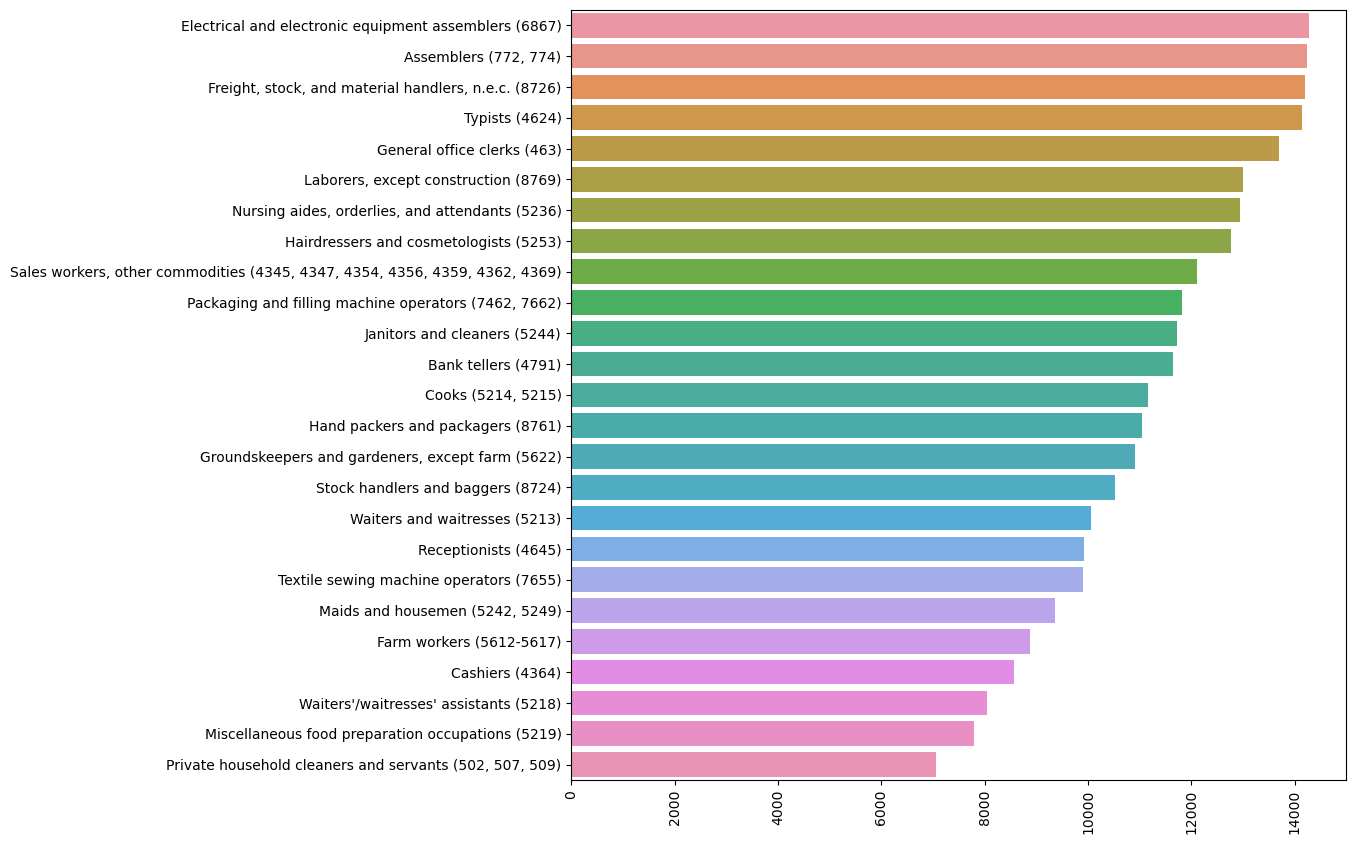

In [223]:
bottom_k = 25
fig, ax = plt.subplots(1,1,figsize=(10,10))
seaborn.barplot(data=None,
                y=df_plot['OCCUP_JOB'].values[-bottom_k:].astype('str'), 
                x=df_plot['REARNING'].values[-bottom_k:],
                orient="h")
_ = plt.xticks(rotation=90) 

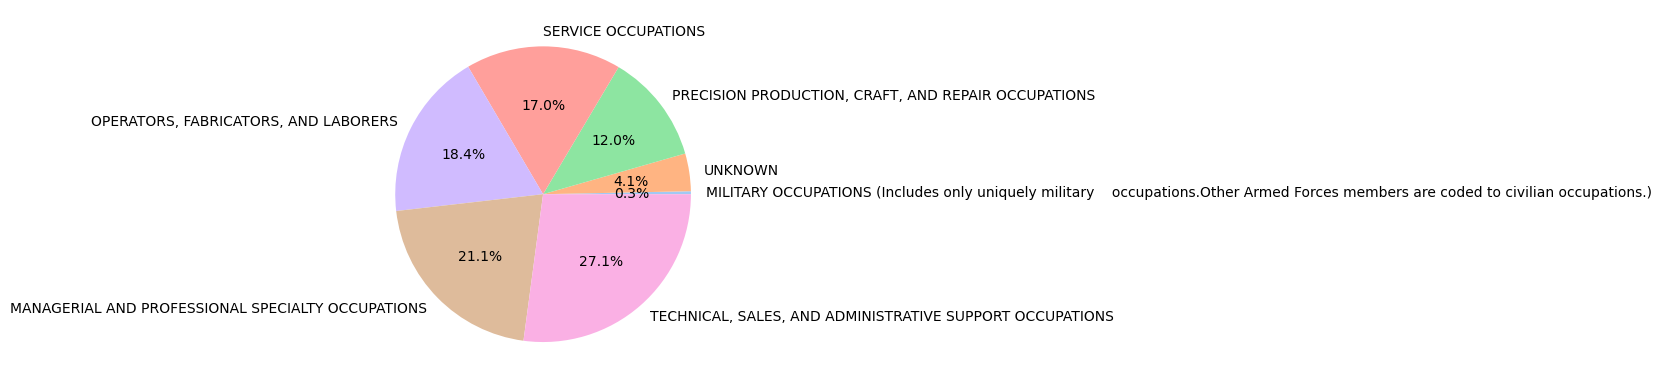

In [233]:
df_plot = df[['OCCUP','OCCUP_SUM']].groupby('OCCUP_SUM').count().reset_index()

#define data
data   = df_plot['OCCUP']
labels = df_plot['OCCUP_SUM']

idx = data.argsort()
data   = [data[i] for i in idx]
labels = [labels[i] for i in idx]

#define Seaborn color palette to use
colors = seaborn.color_palette('pastel')[0:len(data)]

#create pie chart
plt.pie(data, labels = labels, colors = colors, autopct='%.1f%%')
plt.show()

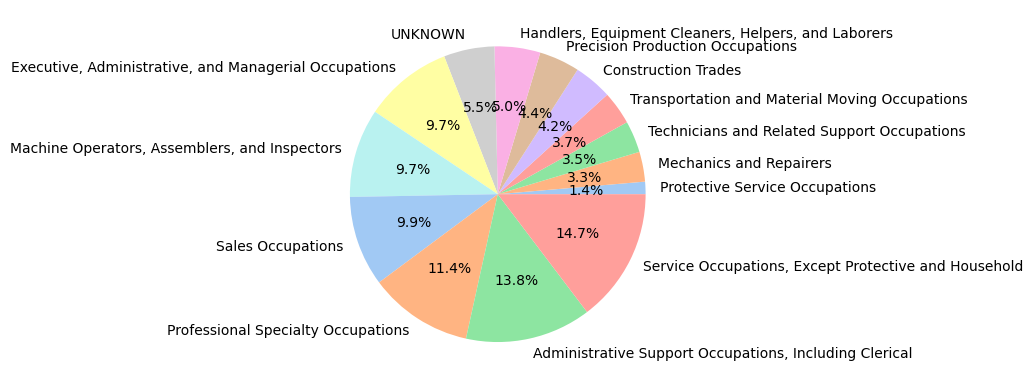

In [234]:
df_plot = df[['OCCUP','OCCUP_MAJ']].groupby('OCCUP_MAJ').count().reset_index()

#define data
data   = df_plot['OCCUP']
labels = df_plot['OCCUP_MAJ']

idx = data.argsort()
data   = [data[i] for i in idx]
labels = [labels[i] for i in idx]

#define Seaborn color palette to use
colors = seaborn.color_palette('pastel')[0:len(data)]

#create pie chart
plt.pie(data, labels = labels, colors = colors, autopct='%.1f%%')
plt.show()

In [361]:
df[['OCCUP','OCCUP_SUM']].groupby('OCCUP_SUM').count()

,OCCUP
OCCUP_SUM,
MANAGERIAL AND PROFESSIONAL SPECIALTY OCCUPATIONS,29068
MILITARY OCCUPATIONS (Includes only uniquely military occupations.Other Armed Forces members are coded to civilian occupations.),444
"OPERATORS, FABRICATORS, AND LABORERS",25329
"PRECISION PRODUCTION, CRAFT, AND REPAIR OCCUPATIONS",16589
SERVICE OCCUPATIONS,23446
"TECHNICAL, SALES, AND ADMINISTRATIVE SUPPORT OCCUPATIONS",37412
UNKNOWN,5682


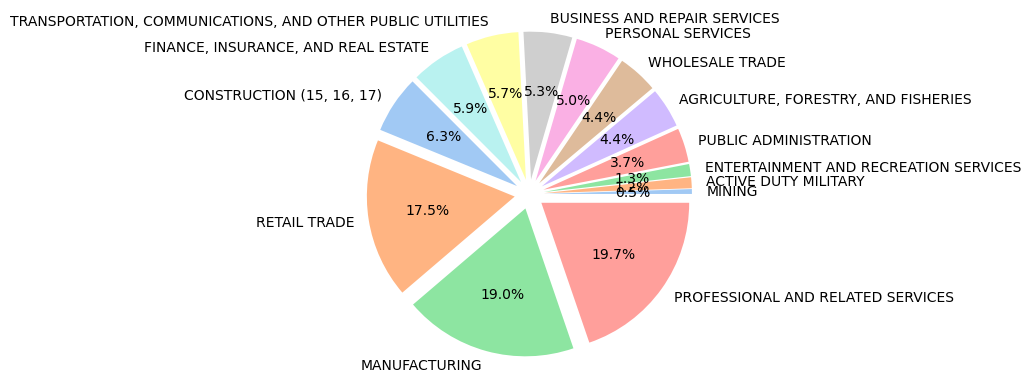

In [254]:
df_plot = df[['INDUSTRY','INDUSTRY_SUM']].groupby('INDUSTRY_SUM').count().reset_index()

#define data
data   = df_plot['INDUSTRY']
labels = df_plot['INDUSTRY_SUM']

idx = data.argsort()
data   = [data[i] for i in idx]
labels = [labels[i] for i in idx]

#define Seaborn color palette to use
colors = seaborn.color_palette('pastel')[0:len(data)]

#create pie chart
plt.pie(data, labels = labels, colors = colors, autopct='%.1f%%',explode=[0.1] * len(data))
plt.show()

### Validation using external sources

Check the USA GDP using our data

In [284]:
# billions in wages
100 * df['REARNING'].sum() / 1e9

274.6216174

In [285]:
gdp_bn_1990 = 5963 
# Share of Labour Compensation in GDP at Current National Prices for United States = 0.61 for 1990
0.61 * gdp_bn_1990

3637.43

In [286]:
tst = pd.read_csv(os.path.join(r"/Users/tom.jubb/Documents/data/us_census/",'USCensus1990raw.data.txt'), 
                 delimiter="\t", 
                 header=0, 
#                  nrows=100000, 
                 dtype=str)
tst.columns = list(df_meta['Var'].values)

In [287]:
# The USCensus1990raw data set contains a one percent sample of the Public Use Microdata Samples (PUMS) person records drawn from the full 1990 census sample.
(250000000 / tst.shape[0])*tst['RPINCOME'].astype(float).sum() / 1e9

3440.7207820577282

In [248]:
# military size : should be 2M
(1640/137970)*250000000

2971660.505907081

### Where is there the largest wage discrpenancy based on race?

In [421]:
import pandas as pd
import folium          #  folium libraries
from   folium.plugins import MarkerCluster

try:
    import geocoder    #  geocoder
except:
    ! pip install geocoder
    import geocoder    #  geocoder
import json

states_geo = '/Users/tom.jubb/Downloads/USA_States_(Generalized).geojson'
# [f['properties']['STATE_NAME'] for f in json.load(open(states_geo,'r'))['features']]

In [422]:
race_map ={
    'White 800 869, 971' : 'white',
}
df['RACE_BW'] = df['RACE'].apply(lambda x: race_map.get(x, 'nonwhite'))

In [423]:
df_wage = df.copy()
df_wage = df_wage[(df_wage['REARNING'] > 5000) & (df_wage['REARNING'] < 100000)]
# df_wage = df_wage[(df_wage['AGE'] > 20) & (df_wage['AGE'] < 80)]
df_wage = df_wage[['POWSTATE','RACE_BW', 'REARNING']].groupby(['POWSTATE','RACE_BW']).mean().reset_index()
df_wage['POWSTATE'] = df_wage['POWSTATE'].apply(lambda x: all_codes['POWSTATE'][str(x).zfill(2)])
df_wage = df_wage.sort_values('REARNING')

data = {}
for state in df_wage['POWSTATE'].unique():
    df_tmp = df_wage[df_wage['POWSTATE'] == state]

    w1 = df_tmp[df_tmp['RACE_BW'] == 'white']['REARNING'].values[0]
    w2 = df_tmp[df_tmp['RACE_BW'] == 'nonwhite']['REARNING'].values[0]
    data[state] = w1/w2

In [424]:
world_choropelth = folium.Map(location=[0, 0], 
                              tiles='Cartodb Positron',
                              zoom_start=2)

world_choropelth.choropleth(
    geo_data=states_geo,
    data=data,
    columns=['POWSTATE', 'REARNING'],
    key_on='feature.properties.STATE_NAME',
    fill_color='Reds',
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Mean Salary Ratio White/Non-White')

# display map
world_choropelth 

/Users/tom.jubb/anaconda3/envs/dio/lib/python3.9/site-packages/folium/folium.py:407: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  warnings.warn(


In [83]:
df['RACE']

array(['White 800 869, 971', 'Asian Indian 600, 982',
       'Other Race 700 799, 986 999',
       'Chinese, Except Taiwanese 605, 976', 'Black 870 934, 972',
       'Korean 612, 979', 'Filipino 608, 977',
       'Cherokee 416 422, 555 557, 562',
       'Tribe Not Specified 548, 549, 576 598 Tr', 'Japanese 611, 981',
       'Vietnamese 619, 980', 'Laotian 613', 'Cambodian 604', 'Thai 618',
       'Hawaiian 653, 654, 978',
       'Alaskan Athabaskan 000, 001, 008, 009, 0', 'Aleut 941 970, 975',
       'Eskimo 935 940, 974', 'Indonesian 610', 'Pakistani 616',
       'All Other Tribes 002 007, 010 013, 015,', 'Tlingit 017',
       'Navajo 275', 'Pueblo 229 254, 506, 573', 'Sri Lankan 617',
       'Tohono Oodham 218 222', 'Pima 217', 'Taiwanese 606, 607',
       'Apache 255 264', 'Sioux 282 312, 326, 327',
       'Shoshone 195 206, 494, 518', 'Guamanian 660, 984',
       'Chippewa 330 353, 355, 544',
       'Choctaw 226, 228, 404, 434, 520, 559',
       'All Other Asian 602, 620 652, 985',

## Migration

In [195]:
df_2 = df.copy()
df_2['POWSTATE'] = df_2['POWSTATE'].apply(lambda x: all_codes['POWSTATE'][str(x).zfill(2)])
df_2['POB']      = df_2['POB'].apply(lambda x: all_codes['POB'][str(x).zfill(3)])

df_wage = df_2.copy()
df_wage = df_wage[['POWSTATE','POB', 'REARNING']].groupby(['POWSTATE','POB']).mean().reset_index()
df_wage = df_wage.sort_values('REARNING', ascending=False)
df_wage['Count'] = df_wage.apply(lambda x: df_2[(df_2['POWSTATE'] == x['POWSTATE']) & 
                                                (df_2['POB']      == x['POB'])        ].shape[0], axis=1)

In [204]:
# some anomalies due to single people
df_wage

,POWSTATE,POB,REARNING,Count
2335,Michigan,Brazil,219573.0,1
402,California,Chad,195516.0,1
1972,Louisiana,Syria,194587.0,1
1943,Louisiana,Lebanon,194587.0,1
2388,Michigan,Maine,194573.0,1
...,...,...,...,...
4898,Wisconsin,England,-2005.0,1
4392,Texas,Paraguay,-2005.0,1
4467,Utah,Hawaii,-2350.0,1
3509,North Dakota,"Germany, Not Specified",-4000.0,1


In [206]:
# high earners, excluding small sample sizes
df_wage[df_wage['Count'] > 50].sort_values('REARNING', ascending=False)

,POWSTATE,POB,REARNING,Count
3279,New York,Japan,63728.474576,118
442,California,Hungary,47208.129630,54
451,California,Iraq,47043.073529,68
3575,Ohio,India,46741.315789,57
2369,Michigan,India,45049.000000,72
...,...,...,...,...
1403,Idaho,Mexico,9929.387500,80
3709,Oklahoma,Mexico,9807.887097,62
4312,Texas,El Salvador,9802.168000,250
3805,Oregon,Mexico,9790.787500,160


,POWSTATE,POB,REARNING,Count
3279,New York,Japan,63728.474576,118
506,California,Ohio,36471.621359,103
515,California,Pennsylvania,36326.588235,102
446,California,India,33767.866812,458
3254,New York,"Germany, Not Specified",33421.205405,185
...,...,...,...,...
3155,New Mexico,Mexico,10697.393665,221
464,California,Laos,10676.405172,116
1085,Florida,Mexico,10559.227390,387
4312,Texas,El Salvador,9802.168000,250


In [199]:
# what education do they have?
df_2[(df_2['POWSTATE'] == 'New York') & (df_2['POB'] == 'Japan')].groupby('YEARSCH_CAT').count()['CITIZEN']

YEARSCH_CAT
10th Grade                                   1
5th, 6th, 7th, or 8th Grade                  1
Associate Degree in Coll., Academic Prog     5
Associate Degree in Coll., Occupational      1
Bachelors Degree                            61
Doctorate Degree                             5
High School Graduate, Diploma or Ged        17
Masters Degree                              15
No School Completed                          3
Professional Degree                          1
Some Coll., But No Degree                    8
Name: CITIZEN, dtype: int64

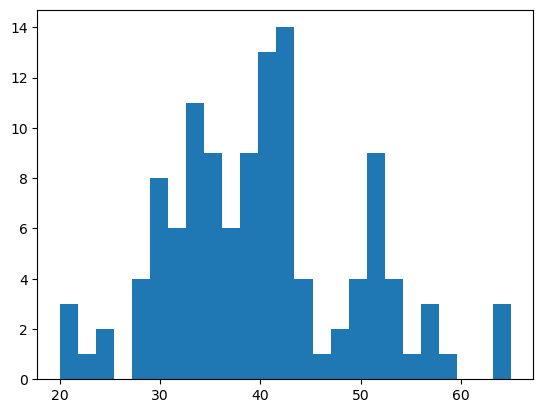

In [200]:
# How old are they?
_ = plt.hist(df_2[(df_2['POWSTATE'] == 'New York') & (df_2['POB'] == 'Japan')]['AGE'], bins=25)

In [201]:
# what are they doing?
df_2[(df_2['POWSTATE'] == 'New York') & (df_2['POB'] == 'Japan')].groupby('OCCUP_SUM').count()

,AGE,ANCSTRY1,ANCSTRY2,ASERVPER,AVAIL,AVETS1,CITIZEN,CLASS,DEPART,DISABL1,...,YEARSCH,YEARWRK,YRSSERV,multilingual,YEARSCH_CAT,OCCUP_JOB,OCCUP_MAJ,INDUSTRY_CAT,INDUSTRY_SUM,RACE_BW
OCCUP_SUM,,,,,,,,,,,,,,,,,,,,,
MANAGERIAL AND PROFESSIONAL SPECIALTY OCCUPATIONS,65,65,65,65,65,65,65,65,65,65,...,65,65,65,65,65,65,65,65,65,65
"OPERATORS, FABRICATORS, AND LABORERS",6,6,6,6,6,6,6,6,6,6,...,6,6,6,6,6,6,6,6,6,6
"PRECISION PRODUCTION, CRAFT, AND REPAIR OCCUPATIONS",4,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4
SERVICE OCCUPATIONS,11,11,11,11,11,11,11,11,11,11,...,11,11,11,11,11,11,11,11,11,11
"TECHNICAL, SALES, AND ADMINISTRATIVE SUPPORT OCCUPATIONS",32,32,32,32,32,32,32,32,32,32,...,32,32,32,32,32,32,32,32,32,32


In [299]:
df.shape

(137970, 70)

In [413]:
# TODO : Sankey the fuck out of this

df_migration = df.copy()

df_migration = df_migration[['PWGT1','POWSTATE',"MIGSTATE"]].groupby(['POWSTATE',"MIGSTATE"]).sum().reset_index()

df_migration = df_migration[(df_migration['POWSTATE'] != 0) & (df_migration['MIGSTATE'] != 0)]
# df_migration = df_migration[(df_migration['POWSTATE'] != 99) & (df_migration['MIGSTATE'] != 99)]


df_migration['POWSTATE'] = df_migration['POWSTATE'].apply(lambda x: all_codes['POWSTATE'][str(x).zfill(2)])
df_migration['MIGSTATE'] = df_migration['MIGSTATE'].apply(lambda x: all_codes['MIGSTATE'][str(x).zfill(2)])

df_migration.sort_values('PWGT1', ascending=False).head(50)

,POWSTATE,MIGSTATE,PWGT1
115,California,California,1779906.0
1400,Texas,Texas,756277.0
163,California,Other Abroad in 1985,583745.0
1032,New York,New York,512180.0
294,Florida,Florida,371532.0
442,Illinois,Illinois,287285.0
1047,New York,Other Abroad in 1985,207724.0
956,New Jersey,New Jersey,201888.0
49,Arizona,Arizona,115846.0
701,Massachusetts,Massachusetts,110732.0


In [418]:

df['RPOB']

0         10
1         10
2         10
3         52
4         24
          ..
137965    24
137966    10
137967    22
137968    24
137969    22
Name: RPOB, Length: 137970, dtype: int64

In [419]:
all_codes['RPOB']

{'10': 'Born in State of Res.',
 '21': 'Northeast',
 '22': 'Midwest',
 '23': 'South',
 '24': 'West',
 '31': 'Puerto Rico',
 '32': 'American Samoa',
 '33': 'Guam',
 '34': 'Northern Marianas',
 '35': 'Us Virgin Islands',
 '36': 'Elsewhere',
 '40': 'Born Abroad of American Parents',
 '51': 'Naturalized Citizen',
 '52': 'Not a Citizen'}

In [415]:
df["POB"]

0           1
1           1
2           1
3         210
4           6
         ... 
137965     30
137966     56
137967     38
137968     35
137969     17
Name: POB, Length: 137970, dtype: int64